In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
100% 1.06G/1.06G [00:53<00:00, 23.6MB/s]
100% 1.06G/1.06G [00:53<00:00, 21.5MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [12]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout
import numpy as np
import matplotlib.pyplot as plt

In [5]:
#creating generators
#generatoes divide the data into batches
train_ds=keras.utils.image_dataset_from_directory(
    directory='/content/train',
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(256, 256)
)
test_ds=keras.utils.image_dataset_from_directory(
    directory='/content/test',
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(256, 256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [6]:
#normalisation
def normal(image,label):
  image=tf.cast(image/255.0,tf.float32)
  return image,label
train_ds=train_ds.map(normal)
test_ds=test_ds.map(normal)

In [8]:
#create a cnn model
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [9]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                      

In [10]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])


In [11]:
model.fit(train_ds,epochs=10,validation_data=test_ds)

Epoch 1/10
625/625 [==============================] - 82s 115ms/step - loss: 1.2799 - accuracy: 0.5957 - val_loss: 0.6251 - val_accuracy: 0.6506
Epoch 2/10
625/625 [==============================] - 83s 132ms/step - loss: 0.5696 - accuracy: 0.7060 - val_loss: 0.5565 - val_accuracy: 0.7078
Epoch 3/10
625/625 [==============================] - 68s 109ms/step - loss: 0.4837 - accuracy: 0.7687 - val_loss: 0.4989 - val_accuracy: 0.7560
Epoch 4/10
625/625 [==============================] - 67s 106ms/step - loss: 0.4250 - accuracy: 0.8067 - val_loss: 0.5183 - val_accuracy: 0.7352
Epoch 5/10
625/625 [==============================] - 67s 106ms/step - loss: 0.3766 - accuracy: 0.8308 - val_loss: 0.4761 - val_accuracy: 0.7858
Epoch 6/10
625/625 [==============================] - 67s 107ms/step - loss: 0.3100 - accuracy: 0.8684 - val_loss: 0.6650 - val_accuracy: 0.7402
Epoch 7/10
625/625 [==============================] - 66s 104ms/step - loss: 0.2164 - accuracy: 0.9103 - val_loss: 0.7877 - val_ac

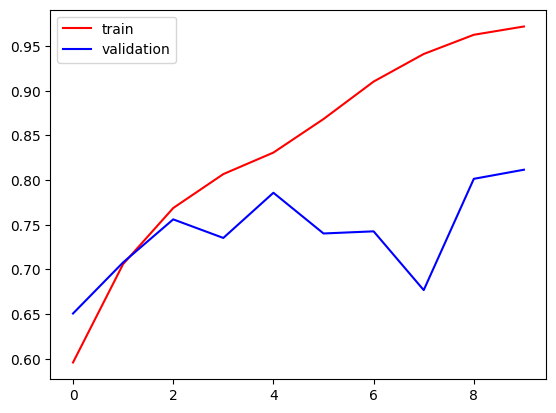

In [13]:
plt.plot(model.history.history['accuracy'],color='red',label='train')
plt.plot(model.history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

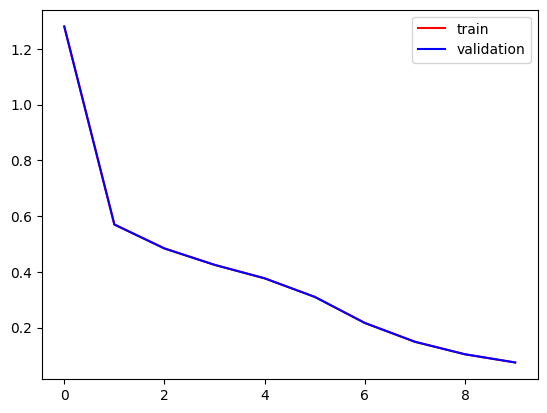

In [14]:
plt.plot(model.history.history['loss'],color='red',label='train')
plt.plot(model.history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [15]:
import cv2

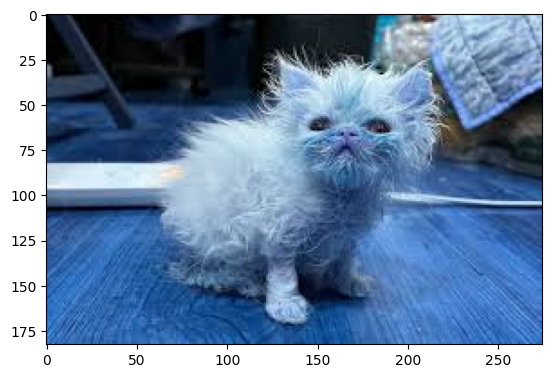

In [16]:
test_img=cv2.imread('/content/c.jpeg')
plt.imshow(test_img)

In [17]:
test_img.shape

(183, 275, 3)

In [18]:
test_img=cv2.resize(test_img,(256,256))
test_input=test_img.reshape((1,256,256,3))

In [19]:
pred=model.predict(test_input)
if(pred==0):
  print('cat')
else:
  print('dog')

1/1 [==============================] - 0s 380ms/step
cat
